# Handwritten digits

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.manifold import Isomap
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

I have found this function to plot the digits on the isomap documentation. It plots the projection of the original data onto each embedding. It will allow us to check whether or digits are grouped together in the embedding space, or scattered across it.

In [2]:
# function to plot the results

def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

Import the digits dataset

In [3]:
digits = datasets.load_digits(n_class=10) # I use all the 10 avaible classes

From task 0 I collect a random image that I want to classify. I plot also the true labels.

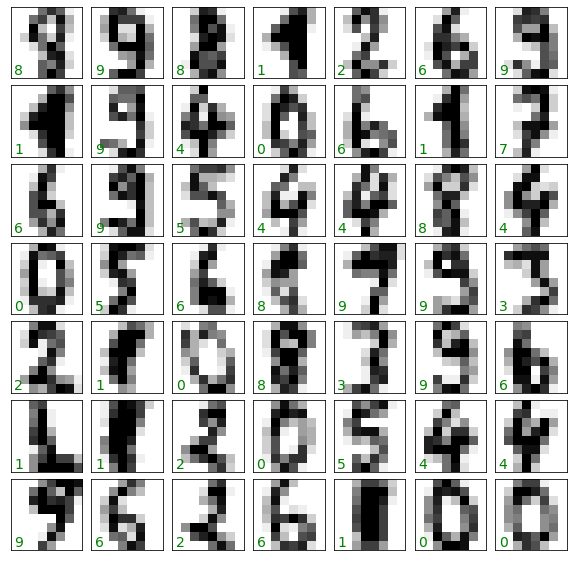

In [4]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(4321) # 4321 from the solutions
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    


I perform a dimensional reduction (similar to PCA), so an unsupervised algorithm, trhough Isomap to reduce from 64 to 2 the dataset dimenions.

    "Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points."
    
  





(1797, 2)


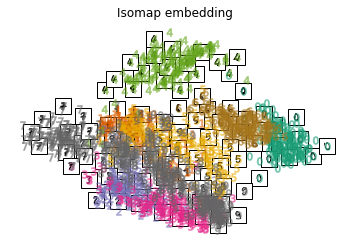

In [5]:
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30 # use the 30 neighbors point to perform the classification

isomap_embedding = Isomap(n_neighbors=n_neighbors, n_components=2)
y_pred = isomap_embedding.fit_transform(X)
print(y_pred.shape)

plot_embedding(y_pred, 'Isomap embedding')

plt.show()

Let me now classify the digits. First of all I havt to split the data in train and test sets. Than I learn my classifier (Linearregression) in this case. And so I can predict for both the tst and training set the labels.

I hav two examples methods to perform an accuracy test:

    - accuracy_test = comput the fraction of correct predictions
    - confusion_matrix = usually used in supervised learning, compare the true value (row) and the predicted one (column). On the diagonal there is the match between correct and predicted values, off diagonal insteda we see whether a values is confused with which.
    
   

/Users/federicoastori/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on test subsample = 0.911
 Accuracy on train subsample = 1.000

Confusion matrix on train: 
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 146   0   0   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 144   0   0   0   0   0]
 [  0   0   0   0   0 145   0   0   0   0]
 [  0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0]
 [  0   0   0   0   0   0   0   0 141   0]
 [  0   0   0   0   0   0   0   0   0 143]]
confusion matrix on test: 
 [[33  0  0  0  1  0  1  0  0  0]
 [ 0 30  0  1  0  0  0  0  0  5]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  2  0  0  6  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  1  0  0  1  0  0 33  1  0]
 [ 0  2  0  0  1  2  0  0 28  0]
 [ 0  2  0  0  0  0  0  0  1 34]]


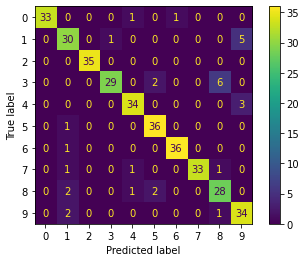

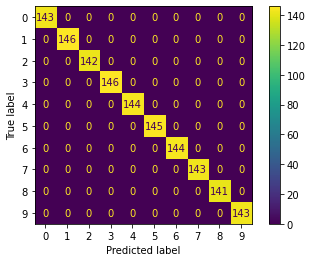

In [8]:
'''# If you work on the image and not on digits.data dirctly
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
'''
# Create a classifier: Logistic regression
clf = LogisticRegression(random_state=0, solver='sag')

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
ypred = clf.predict(X_train)

test_accuracy = metrics.accuracy_score(y_test, predicted)
train_accuracy = metrics.accuracy_score(y_train, ypred)

print('Accuracy on test subsample = %1.3f\n Accuracy on train subsample = %1.3f\n' % (test_accuracy,train_accuracy) )
print('Confusion matrix on train: \n',confusion_matrix(y_train, ypred))
print('confusion matrix on test: \n',confusion_matrix(y_test, predicted))

# plot the confusion matrix

confusion_matrix_train = confusion_matrix(y_train, ypred)
confusion_matrix_test = confusion_matrix(y_test, predicted)

  
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train)#, display_labels = [False, True])
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test)#, display_labels = [False, True])

cm_display_test.plot()
cm_display_train.plot() 

plt.show()


Let me visualize the digits table with th predictions colored in red if wrong and in green else.

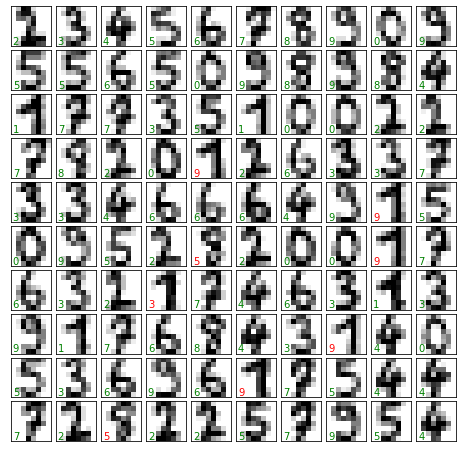

In [9]:

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X_test[i].reshape(8, 8)), cmap='binary')
    ax.text(0.05, 0.05, str(predicted[i]), transform=ax.transAxes, 
            color='green' if (y_test[i] == predicted[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])